In [1]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df= pd.read_csv('fetal_health.csv') 

In [15]:
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [16]:
df.shape

(2126, 22)

In [17]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [18]:
df.fetal_health.unique()

array([2., 1., 3.])

In [19]:
corr_mat = df.corr()

<AxesSubplot:>

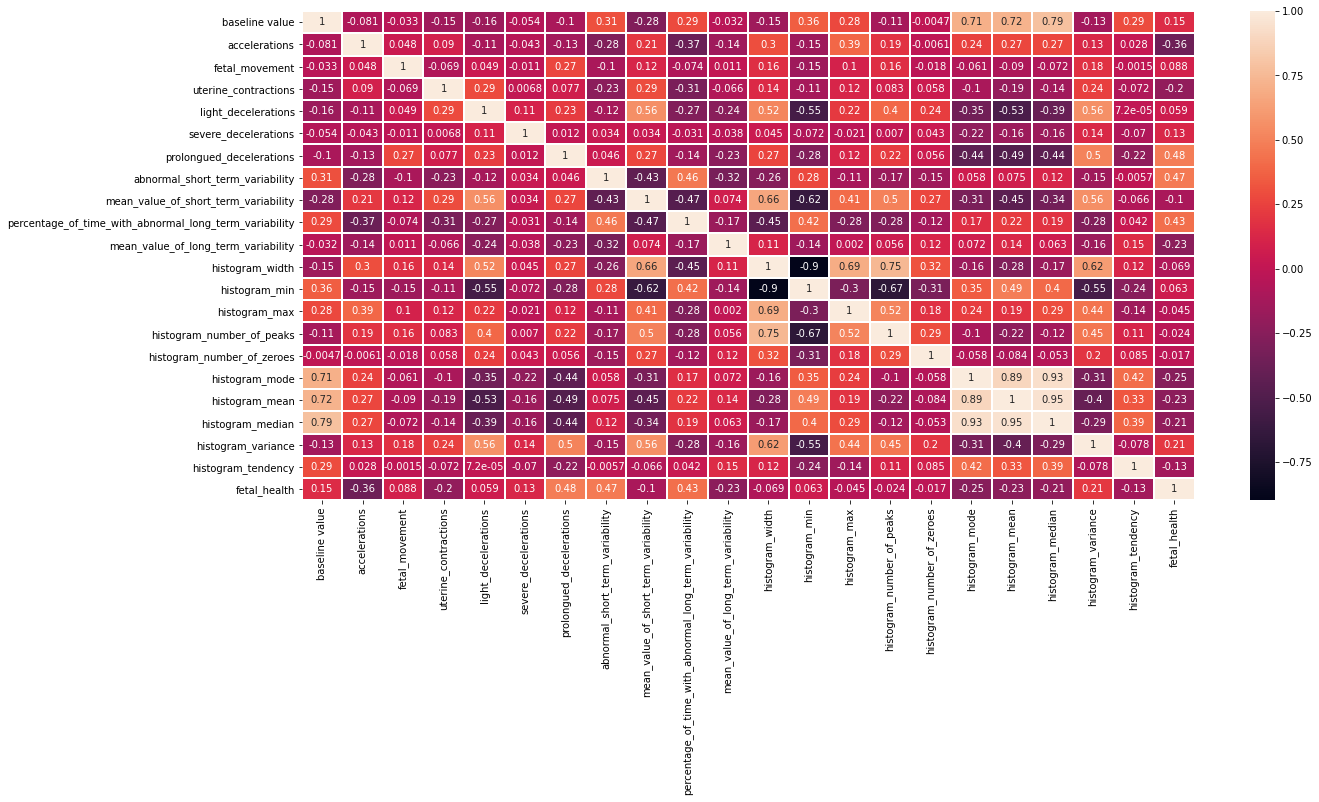

In [20]:
plt.figure(figsize=(20,9))
sns.heatmap(data=corr_mat,annot=True,linewidth=1,linecolor='w')

In [12]:
data1 = data.copy()
data1.fetal_health = data1.fetal_health.astype('int')
data1.fetal_health = data1.fetal_health.replace([1,2,3],['Normal','Suspect','Pathological'])

([<matplotlib.patches.Wedge at 0x229007b9460>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.3460397647298661, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

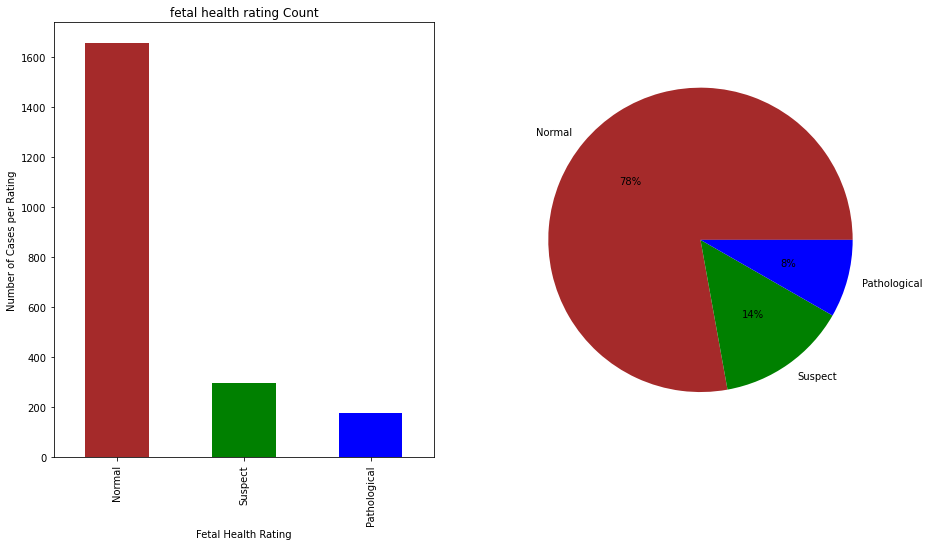

In [13]:
plt.figure(figsize=(15,8))

plt.subplot(121)
data1.fetal_health.value_counts().plot(kind='bar',figsize=(15,8),color = ['brown','g','b'])
plt.title('fetal health rating Count')
plt.xlabel('Fetal Health Rating')
plt.ylabel('Number of Cases per Rating')

plt.subplot(122)
plt.pie(data1.fetal_health.value_counts(),labels=[
    'Normal', 'Suspect', 'Pathological'], colors = ['brown', 'g', 'b'], autopct='%1.0f%%')



## KNN 

In [21]:
# Defining Features Matrix
X = df.drop(['fetal_health'], axis=1)
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [22]:
# Define Target
y = data['fetal_health']
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [24]:
# Separate training and testing sets, stratifying by class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [25]:
#Standardize variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [26]:
y_train.value_counts()

1.0    1241
2.0     221
3.0     132
Name: fetal_health, dtype: int64

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#Creating Function for Cross Validation

def scores_knn(X, y, start,stop,step):
    
    # We are going to graph the different values of the cross validation score based on the n_neighbors hyperparameter
    # For this we are going to generate a list of dictionaries that can then be easily converted into a DataFrame
    
    # List of dictionaries - we initialize it empty and outside the for loop to feed it in each iteration
    scores_for_df = []
    
    
    for i in range(start,stop,step):
        
        # At each iteration, we instantiate the model with a different hyperparameter
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores returns an array of 5 results, one for each partition that CV automatically made
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # For each value of n_neighbours, we create a dictionary with the value of n_neighbours and the mean and deviation of the scores
        dict_row_score = {'medium_score':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # We save each one in the list of dictionaries
        scores_for_df.append(dict_row_score)
    
    # We create the DF from the list of results
    df_scores = pd.DataFrame(scores_for_df)
    
    # We incorporate the lower and upper limits, subtracting and adding the value of the standard deviation, respectively
    df_scores['lower_limit'] = df_scores['medium_score'] - df_scores['score_std']
    df_scores['upper_limit'] = df_scores['medium_score'] + df_scores['score_std']
    
    # Return DF
    return df_scores

In [61]:
# CV for 1 to 20 neighbors
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

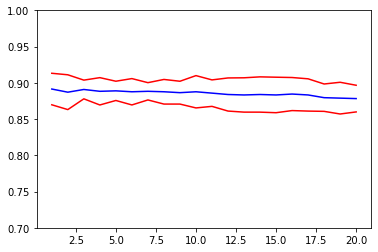

In [62]:
# viewing the results

plt.plot(df_scores['n_neighbours'], df_scores['lower_limit'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['medium_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_limit'], color='r')
plt.ylim(0.7, 1);

In [63]:
df_scores

,medium_score,score_std,n_neighbours,lower_limit,upper_limit
0,0.891458,0.021735,1,0.869723,0.913193
1,0.887099,0.024012,2,0.863087,0.911111
2,0.890841,0.012905,3,0.877936,0.903746
3,0.888318,0.018853,4,0.869465,0.907171
4,0.888947,0.013282,5,0.875665,0.902228
5,0.887685,0.018183,6,0.869502,0.905867
6,0.888322,0.011924,7,0.876398,0.900245
7,0.887697,0.016989,8,0.870708,0.904685
8,0.886447,0.015748,9,0.870699,0.902194
9,0.887677,0.022292,10,0.865385,0.909969


In [64]:
#Balancing Target Data with SMOTE
from imblearn.over_sampling import SMOTE

def SMOTE_f(X_train,y_train):
    sm = SMOTE(random_state=42)
    X_train_smo, y_train_smo = sm.fit_resample(X_train,y_train)
    return X_train_smo, y_train_smo

In [65]:
X_train_smo, y_train_smo = SMOTE_f(X_train,y_train)

In [66]:
#checking that the target data is balanced
y_train_smo.value_counts()

2.0    1241
3.0    1241
1.0    1241
Name: fetal_health, dtype: int64

In [67]:
# PCV for 1 to 20 neighbors with SMOTE
df_scores= scores_knn(X_train_smo, y_train_smo, 1, 21, 1)

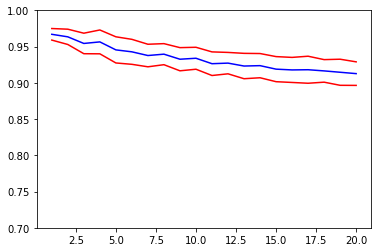

In [68]:
# viewing the results

plt.plot(df_scores['n_neighbours'], df_scores['lower_limit'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['medium_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_limit'], color='r')
plt.ylim(0.7, 1);

In [69]:
df_scores

,medium_score,score_std,n_neighbours,lower_limit,upper_limit
0,0.966964,0.007965,1,0.958999,0.974928
1,0.963470,0.010553,2,0.952918,0.974023
2,0.954340,0.014151,3,0.940189,0.968491
3,0.956490,0.016447,4,0.940043,0.972936
4,0.945476,0.018047,5,0.927429,0.963522
5,0.942787,0.017235,6,0.925553,0.960022
6,0.937685,0.015557,7,0.922128,0.953242
7,0.939564,0.014526,8,0.925037,0.954090
8,0.932584,0.015985,9,0.916598,0.948569
9,0.933925,0.015143,10,0.918782,0.949068


In [70]:
#Identifying the maximum score
df_scores.loc[df_scores.medium_score == df_scores.medium_score.max()]

,medium_score,score_std,n_neighbours,lower_limit,upper_limit
0,0.966964,0.007965,1,0.958999,0.974928


In [71]:
# Assigning the value of optimal k to a variable
best_k = df_scores.loc[df_scores.medium_score == df_scores.medium_score.max(),'n_neighbours'].values[0]
best_k

1

In [72]:
# Choosing the optimal model that cross validation had indicated
model = KNeighborsClassifier(n_neighbors=best_k)

# Fitting on training data
model.fit(X_train_smo, y_train_smo)

KNeighborsClassifier(n_neighbors=1)

In [75]:
from sklearn.metrics import accuracy_score

#  Evaluatingn accuracy on train
accuracy_score(y_train, model.predict(X_train))

0.9993726474278545

In [76]:
# Predicting on test
y_pred = model.predict(X_test)

In [77]:
# Evaluatingn accuracy on test
accuracy_score(y_test, y_pred)

0.8928571428571429

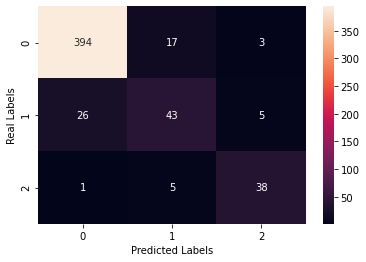

In [78]:
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels');

In [87]:
#Clasification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       414
         2.0       0.66      0.58      0.62        74
         3.0       0.83      0.86      0.84        44

    accuracy                           0.89       532
   macro avg       0.81      0.80      0.80       532
weighted avg       0.89      0.89      0.89       532



In [47]:
from sklearn.metrics import roc_curve

In [89]:
#Installing YellowBrick for multi class ROCAUC implementation
pip install yellowbrick

In [90]:
from yellowbrick.classifier import ROCAUC

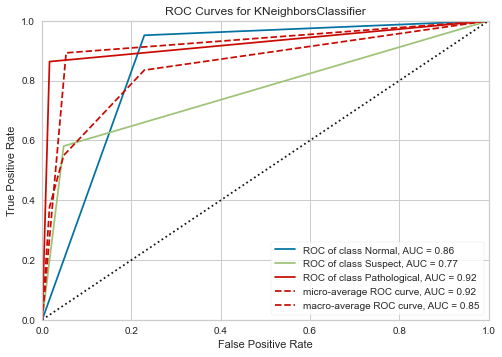

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [91]:
model = model
visualizer = ROCAUC(model, classes=["Normal", "Suspect", "Pathological"])

visualizer.fit(X_train_smo, y_train_smo)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()